In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from load_data import extract_zip
from utils import split_data

### Read Data

In [ ]:
url = 'https://github.com/mattharrison/datasets/raw/master/data/kaggle-survey-2018.zip'
filename = 'kaggle-survey-2018.zip'
member_name = 'multipleChoiceResponses.csv'

raw = extract_zip(url, filename, member_name)
X_train, y_train, set_y = split_data(raw = raw, ycol = 'Q6')

### Correlation Matrix

#### Option 1

In [ ]:
(X_train
.assign(data_scientist = y_train == 'Data Scientist')
.corr(method='spearman')
.style
.background_gradient(cmap = 'RdBu', vmax=1, vmin=-1)
.set_sticky(axis='index')
)

#### Option 2

In [4]:
# Correlation Matrix
corr_matrix = X_train.corr(method='spearman')
styled_corr_matrix = corr_matrix.style.background_gradient(cmap='RdBu', vmax=1, vmin=-1)
styled_corr_matrix.set_properties(**{'position': 'sticky', 'top': '0'})


### Bar Plot

In [ ]:
fig, ax = plt.subplot(figsize=(8, 4))
(X_train
.assign(data_scientist = y_train)
.groupby('r')
.data_scientist
.value_counts()
.unstack()
.plot.bar(ax=ax)
)

<AxesSubplot:xlabel='major_cs'>

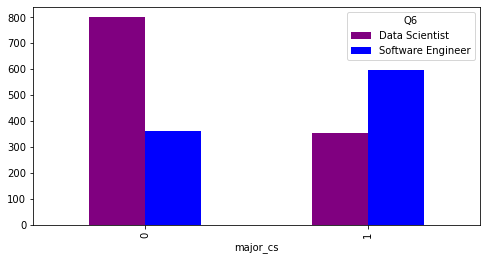

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
colors = ['purple', 'blue']

crosstab_df = pd.crosstab(index=X_train['major_cs'], columns=set_y)

crosstab_df.plot.bar(ax=ax, color=colors)


<AxesSubplot:xlabel='years_exp', ylabel='compensation'>

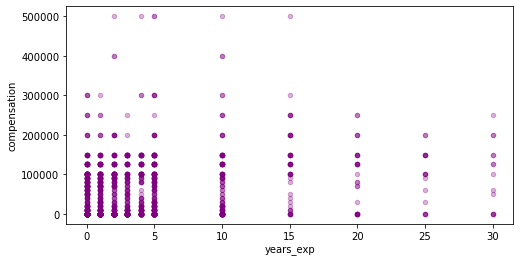

In [4]:
fig, ax = plt.subplots(figsize=(8, 4))
(X_train
.plot.scatter(x='years_exp', y='compensation', alpha=0.3, ax=ax, c='purple'))

In [ ]:
from seaborn import objects as so
fig = plt.figure(figsize=(8, 4))
(so.Plot(X_train.assign(title=y_train), x='years_exp', y='compensation', color='title')
.add(so.Dots(alpha=0.3, pointsize=2), so.Jitter(x=0.5, y=10_000))
.add(so.Line(), so.PolyFit())
.on(fig)
.plot()
)

In [ ]:
fig = plt.figure(figsize=(8, 4))
(so
 .Plot(X_train
       .assign(
         title=y_train,
         country=(X_train
             .loc[:, 'Q3_United States of America': 'Q3_China']
             .idxmax(axis='columns')
            )
       ), x='years_exp', y='compensation', color='title')
 .facet('country')
 .add(so.Dots(alpha=.01, pointsize=2, color='grey' ), so.Jitter(x=.5, y=10_000), col=None)
 .add(so.Dots(alpha=.5, pointsize=1.5), so.Jitter(x=.5, y=10_000))
 .add(so.Line(pointsize=1), so.PolyFit(order=2))
 .scale(x=so.Continuous().tick(at=[0,1,2,3,4,5]))
 .limit(y=(-10_000, 200_000), x=(-1, 6))
 .on(fig)
 .plot()
)